## Final Project Extension: t-SNE Visualization

- `part-00000-ce400e65-93b9-49d5-9b22-8cbfbaa7850c-c000.snappy.parquet`: one of the Parquet files located in the `itemFactors` folder inside the saved model files

- `tags.parquet`: same Parquet file located at `hdfs:/user/bm106/pub/project`

- `track_info.parquet`: the file created by applying `StringIndexer` on `metadata.parquet` in order to map the `id` values back to the original `track_id` in the parquet file for item factors 

In [1]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pyarrow
import os
import time

In [2]:
item_factors_path = os.getcwd() + \
'/model_rank60_reg0.01_alpha0.4/itemFactors/part-00000-ce400e65-93b9-49d5-9b22-8cbfbaa7850c-c000.snappy.parquet'

In [3]:
item_factors = pd.read_parquet(item_factors_path)

In [4]:
item_factors.head()

,id,features
0,20,"[2.0289364e-05, 1.468579e-05, -1.7009055e-05, ..."
1,40,"[-0.015749535, -0.010427434, 0.005337602, -0.0..."
2,50,"[-1.5780674e-07, 1.921834e-06, -7.2803327e-06,..."
3,90,"[1.7456241e-05, 4.8125272e-05, -2.3342092e-05,..."
4,130,"[-2.061478e-05, 0.00081966765, 0.00061191816, ..."


In [5]:
feat_num = len(item_factors.features[0])
feat_cols = ['feat ' + str(i) for i in range(feat_num)]
features = pd.DataFrame(item_factors.features.tolist(), columns = feat_cols)
features.head()

,feat 0,feat 1,feat 2,feat 3,feat 4,feat 5,feat 6,feat 7,feat 8,feat 9,...,feat 50,feat 51,feat 52,feat 53,feat 54,feat 55,feat 56,feat 57,feat 58,feat 59
0,2.028936e-05,0.000015,-0.000017,0.000031,-0.000069,-0.000061,4.070283e-05,-0.000010,-0.000009,0.000012,...,0.000011,0.000012,-0.000008,-0.000018,0.000022,0.000086,0.000033,-0.000017,6.519017e-05,-0.000013
1,-1.574953e-02,-0.010427,0.005338,-0.005245,-0.022041,0.010369,-1.178791e-03,0.016243,0.013342,-0.039882,...,-0.026425,-0.003227,-0.024088,0.034461,-0.022148,0.011748,0.001775,0.020336,1.513892e-02,0.021765
2,-1.578067e-07,0.000002,-0.000007,-0.000007,0.000002,0.000004,-8.336929e-07,-0.000002,0.000001,-0.000003,...,-0.000002,-0.000006,0.000005,-0.000006,-0.000006,0.000001,-0.000002,0.000004,3.071905e-07,-0.000003
3,1.745624e-05,0.000048,-0.000023,-0.000005,0.000019,0.000047,-1.681744e-05,-0.000040,0.000036,0.000006,...,-0.000064,0.000013,-0.000012,-0.000015,-0.000012,0.000036,-0.000014,0.000004,-2.141222e-05,-0.000015
4,-2.061478e-05,0.000820,0.000612,0.000224,0.000534,-0.000355,-2.337499e-04,0.000986,-0.000428,0.000020,...,0.000042,0.000011,0.000213,-0.000248,-0.000086,0.000385,-0.000261,0.000263,5.506464e-05,-0.000086


In [6]:
features.shape

(26975, 60)

### t-SNE

In [7]:
np.random.seed(1004)
time_start = time.time()
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 20, n_iter = 300)
embedded = tsne.fit_transform(features)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 26975 samples in 0.099s...
[t-SNE] Computed neighbors for 26975 samples in 93.451s...
[t-SNE] Computed conditional probabilities for sample 1000 / 26975
[t-SNE] Computed conditional probabilities for sample 2000 / 26975
[t-SNE] Computed conditional probabilities for sample 3000 / 26975
[t-SNE] Computed conditional probabilities for sample 4000 / 26975
[t-SNE] Computed conditional probabilities for sample 5000 / 26975
[t-SNE] Computed conditional probabilities for sample 6000 / 26975
[t-SNE] Computed conditional probabilities for sample 7000 / 26975
[t-SNE] Computed conditional probabilities for sample 8000 / 26975
[t-SNE] Computed conditional probabilities for sample 9000 / 26975
[t-SNE] Computed conditional probabilities for sample 10000 / 26975
[t-SNE] Computed conditional probabilities for sample 11000 / 26975
[t-SNE] Computed conditional probabilities for sample 12000 / 26975
[t-SNE] Computed conditional probabilities for sa

In [8]:
features['tsne-2d-one'] = embedded[:, 0]
features['tsne-2d-two'] = embedded[:, 1]

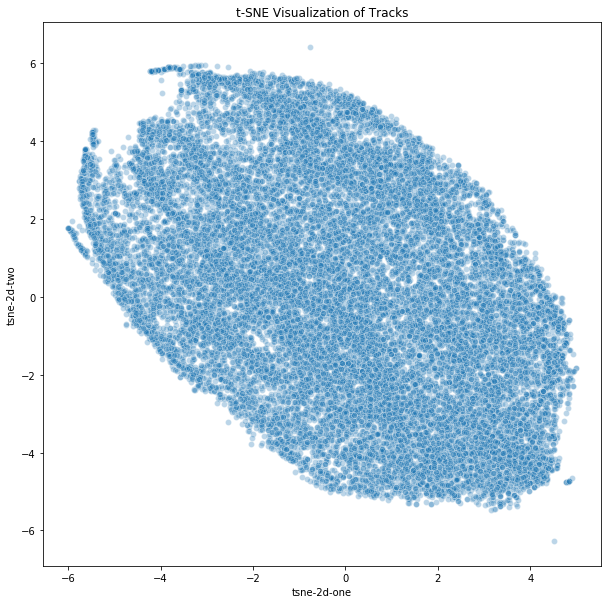

In [10]:
plt.figure(figsize = (10, 10))

sns.scatterplot(
    x = 'tsne-2d-one', y = 'tsne-2d-two',
    palette = sns.color_palette('hls', 10),
    data = features,
    alpha = 0.3
)

plt.title('t-SNE Visualization of Tracks')
plt.show()

### Group Tracks by Tags

In [11]:
tags_path = os.getcwd() + '/tags.parquet'
tags = pd.read_parquet(tags_path)
track_info_path = os.getcwd() + '/track_info.parquet'
track_info = pd.read_parquet(track_info_path)

In [12]:
track_info.track_label = track_info.track_label.astype(int)
track_info.head()

,track_id,track_label
0,TRMMMYQ128F932D901,269284
1,TRMMMKD128F425225D,138371
2,TRMMMRX128F93187D9,203456
3,TRMMMCH128F425532C,632934
4,TRMMMWA128F426B589,354059


In [13]:
track_dict = dict(zip(track_info.track_label, track_info.track_id))

In [14]:
item_factors = item_factors.replace({'id': track_dict})

In [15]:
item_factors.head()

,id,features
0,TRIXRRV12903D11B85,"[2.0289364e-05, 1.468579e-05, -1.7009055e-05, ..."
1,TRLDKHF128F933BBBE,"[-0.015749535, -0.010427434, 0.005337602, -0.0..."
2,TRQQMEJ12903C96398,"[-1.5780674e-07, 1.921834e-06, -7.2803327e-06,..."
3,TRDFMAE128F423D3F2,"[1.7456241e-05, 4.8125272e-05, -2.3342092e-05,..."
4,TRHDZDD128F92F82D2,"[-2.061478e-05, 0.00081966765, 0.00061191816, ..."


In [16]:
tags = tags.drop(['score'], axis = 1)
tags.head()

,track_id,tag
0,TRCCCYE12903CFF0E9,classic rock
1,TRCCCYE12903CFF0E9,Progressive rock
2,TRCCCFH12903CEBC70,blues
3,TRCCCFH12903CEBC70,memphis slim
4,TRCCCJT128F429FFF6,pop


In [17]:
len(tags.tag.unique())

522366

In [18]:
tags['tag'].value_counts().head(15)

rock                 101071
pop                   69159
alternative           55777
indie                 48175
electronic            46270
female vocalists      42565
favorites             39921
Love                  34901
dance                 33618
00s                   31432
alternative rock      30334
jazz                  30152
beautiful             29421
singer-songwriter     27910
metal                 27430
Name: tag, dtype: int64

In [19]:
item_factors['id'].isin(tags['track_id']).value_counts()

True     19737
False     7238
Name: id, dtype: int64

In [20]:
item_factors.shape

(26975, 2)

In [21]:
item_factors = pd.merge(item_factors, tags, left_on = ['id'], right_on = ['track_id'])

In [22]:
item_factors = item_factors.drop(columns = ['id', 'track_id'], axis = 1)
item_factors.head()

,features,tag
0,"[-0.015749535, -0.010427434, 0.005337602, -0.0...",colbie caillat
1,"[-0.015749535, -0.010427434, 0.005337602, -0.0...",female vocalists
2,"[-0.015749535, -0.010427434, 0.005337602, -0.0...",acoustic
3,"[-0.015749535, -0.010427434, 0.005337602, -0.0...",female vocalist
4,"[-0.015749535, -0.010427434, 0.005337602, -0.0...",pop


In [23]:
item_factors.shape

(429376, 2)

In [24]:
len(item_factors.tag.unique())

99367

In [25]:
item_factors['tag'].value_counts()

rock                                       5351
alternative                                3468
pop                                        3164
indie                                      3019
electronic                                 2282
favorites                                  2097
female vocalists                           2063
00s                                        1858
alternative rock                           1854
Love                                       1780
beautiful                                  1665
indie rock                                 1606
metal                                      1516
Awesome                                    1492
singer-songwriter                          1482
chillout                                   1481
dance                                      1456
Mellow                                     1397
chill                                      1317
seen live                                  1299
male vocalists                          

In [26]:
# get 15 most popular tags
tags_list = item_factors['tag'].value_counts()[:15].index.tolist()
tags_list

['rock',
 'alternative',
 'pop',
 'indie',
 'electronic',
 'favorites',
 'female vocalists',
 '00s',
 'alternative rock',
 'Love',
 'beautiful',
 'indie rock',
 'metal',
 'Awesome',
 'singer-songwriter']

In [27]:
item_factors = item_factors.loc[item_factors['tag'].isin(tags_list)]
item_factors.shape

(34697, 2)

In [28]:
feat_cols = ['feat ' + str(i) for i in range(feat_num)]
item_factors[feat_cols] = pd.DataFrame(item_factors.features.tolist(), index = item_factors.index)
item_factors = item_factors.drop(['features'], axis = 1)

In [29]:
item_factors.head()

,tag,feat 0,feat 1,feat 2,feat 3,feat 4,feat 5,feat 6,feat 7,feat 8,...,feat 50,feat 51,feat 52,feat 53,feat 54,feat 55,feat 56,feat 57,feat 58,feat 59
1,female vocalists,-0.015750,-0.010427,0.005338,-0.005245,-0.022041,0.010369,-0.001179,0.016243,0.013342,...,-0.026425,-0.003227,-0.024088,0.034461,-0.022148,0.011748,0.001775,0.020336,0.015139,0.021765
4,pop,-0.015750,-0.010427,0.005338,-0.005245,-0.022041,0.010369,-0.001179,0.016243,0.013342,...,-0.026425,-0.003227,-0.024088,0.034461,-0.022148,0.011748,0.001775,0.020336,0.015139,0.021765
8,favorites,-0.015750,-0.010427,0.005338,-0.005245,-0.022041,0.010369,-0.001179,0.016243,0.013342,...,-0.026425,-0.003227,-0.024088,0.034461,-0.022148,0.011748,0.001775,0.020336,0.015139,0.021765
35,rock,0.000026,0.000007,0.000001,-0.000024,-0.000004,0.000012,0.000002,-0.000035,0.000014,...,0.000020,-0.000009,-0.000005,0.000025,-0.000016,0.000007,0.000009,-0.000020,-0.000023,0.000019
66,metal,-0.000126,0.000099,-0.000016,-0.000031,-0.000033,0.000168,0.000070,-0.000026,0.000041,...,0.000012,0.000012,0.000126,0.000203,0.000086,-0.000011,0.000137,0.000088,0.000061,0.000106


In [30]:
features = item_factors[feat_cols].values

np.random.seed(1004)
time_start = time.time()
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 20, n_iter = 300)
tsne_results = tsne.fit_transform(features)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 34697 samples in 0.117s...
[t-SNE] Computed neighbors for 34697 samples in 138.085s...
[t-SNE] Computed conditional probabilities for sample 1000 / 34697
[t-SNE] Computed conditional probabilities for sample 2000 / 34697
[t-SNE] Computed conditional probabilities for sample 3000 / 34697
[t-SNE] Computed conditional probabilities for sample 4000 / 34697
[t-SNE] Computed conditional probabilities for sample 5000 / 34697
[t-SNE] Computed conditional probabilities for sample 6000 / 34697
[t-SNE] Computed conditional probabilities for sample 7000 / 34697
[t-SNE] Computed conditional probabilities for sample 8000 / 34697
[t-SNE] Computed conditional probabilities for sample 9000 / 34697
[t-SNE] Computed conditional probabilities for sample 10000 / 34697
[t-SNE] Computed conditional probabilities for sample 11000 / 34697
[t-SNE] Computed conditional probabilities for sample 12000 / 34697
[t-SNE] Computed conditional probabilities for s

In [31]:
item_factors['tsne-2d-one'] = tsne_results[:, 0]
item_factors['tsne-2d-two'] = tsne_results[:, 1]

In [32]:
item_factors.head()

,tag,feat 0,feat 1,feat 2,feat 3,feat 4,feat 5,feat 6,feat 7,feat 8,...,feat 52,feat 53,feat 54,feat 55,feat 56,feat 57,feat 58,feat 59,tsne-2d-one,tsne-2d-two
1,female vocalists,-0.015750,-0.010427,0.005338,-0.005245,-0.022041,0.010369,-0.001179,0.016243,0.013342,...,-0.024088,0.034461,-0.022148,0.011748,0.001775,0.020336,0.015139,0.021765,0.618167,-6.816850
4,pop,-0.015750,-0.010427,0.005338,-0.005245,-0.022041,0.010369,-0.001179,0.016243,0.013342,...,-0.024088,0.034461,-0.022148,0.011748,0.001775,0.020336,0.015139,0.021765,0.618167,-6.816850
8,favorites,-0.015750,-0.010427,0.005338,-0.005245,-0.022041,0.010369,-0.001179,0.016243,0.013342,...,-0.024088,0.034461,-0.022148,0.011748,0.001775,0.020336,0.015139,0.021765,0.618167,-6.816850
35,rock,0.000026,0.000007,0.000001,-0.000024,-0.000004,0.000012,0.000002,-0.000035,0.000014,...,-0.000005,0.000025,-0.000016,0.000007,0.000009,-0.000020,-0.000023,0.000019,-3.990812,2.816255
66,metal,-0.000126,0.000099,-0.000016,-0.000031,-0.000033,0.000168,0.000070,-0.000026,0.000041,...,0.000126,0.000203,0.000086,-0.000011,0.000137,0.000088,0.000061,0.000106,0.268402,4.090270


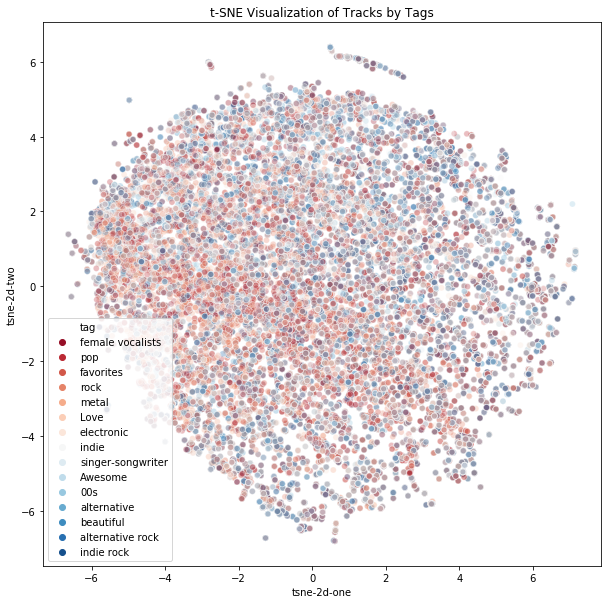

In [34]:
plt.figure(figsize = (10, 10))

sns.scatterplot(
    x = 'tsne-2d-one', y = 'tsne-2d-two',
    hue = 'tag',
    palette = sns.color_palette('RdBu', 15),
    data = item_factors,
    legend = 'full',
    alpha = 0.3
)

plt.title('t-SNE Visualization of Tracks by Tags')
plt.show()